# Gene Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/gene_data.csv', index_col=0, low_memory = False)
meta = pd.read_csv('data/meta.csv')

In [3]:
#Dropping Unit Column, setting index sample ID's and renaming it to 'sample'

meta = meta.drop(['Unit'], axis=1)
meta.set_index(['sIdx'], inplace=True)
meta.index.name = 'sample'

In [4]:
#Extract Lgals4 gene

gene1 = data.loc[data['symbol'] == 'Lgals4']
gene1 = gene1.transpose()
gene1 = gene1.drop(gene1.index[0])
gene1.index.name = 'sample'
gene1.columns = ['Lgals4']

display(gene1)

Lgals4
sample             
S1          445.325
S2      328.8365556
S3          247.984
S4          307.191
S5          210.447
S6          277.899
S7          148.343
S8          122.538
S9          180.272
S10         200.114
S11           244.7
S12         397.942
S13     158.7754965
S14         116.525
S15         295.129
S16         262.932
S17         258.427
S18         326.792
S19         279.339
S20         273.703
S21         267.022
S22         205.653
S23         217.238
S24         261.215
S25         211.316
S26         174.313
S27         247.555
S28         214.319
S29         156.757
S30         175.893

In [5]:
#Extract Kif2c gene

gene2 = data.loc[data['symbol'] == 'Kif2c']
gene2 = gene2.transpose()
gene2 = gene2.drop(gene2.index[0])
gene2.index.name = 'sample'
gene2.columns = ['Kif2c']

display(gene2)

Kif2c
sample             
S1          32.7955
S2      24.35696874
S3          21.1528
S4          28.3154
S5          35.1924
S6          30.7208
S7          42.5235
S8          28.5761
S9          25.5839
S10         36.0492
S11         42.0703
S12         29.9749
S13     21.15279694
S14         29.9858
S15         27.3914
S16         21.1528
S17         34.6878
S18         27.0477
S19         21.1528
S20         21.1528
S21         21.1528
S22         21.1528
S23         21.1528
S24         21.1528
S25         21.1528
S26         28.7851
S27         28.4738
S28         27.3496
S29         21.1528
S30         26.3565

In [6]:
#Merge the dataframes into one single dataset

data = pd.concat([meta['Time'],gene1['Lgals4'],gene2['Kif2c']],axis=1)

<Figure size 432x288 with 0 Axes>

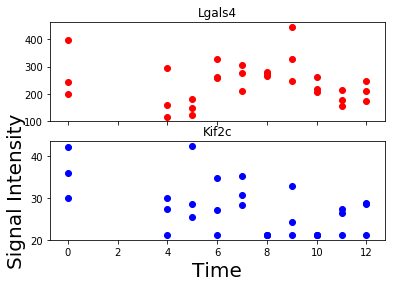

In [7]:
#Scatter Plot

plt.figure(1)
fig, ax = plt.subplots(2, sharex = True)

ax[0].scatter(data['Time'], data['Lgals4'], color = 'r')
ax[0].set_title('Lgals4')

ax[1].scatter(data['Time'], data['Kif2c'], color = 'b')
ax[1].set_title('Kif2c')

plt.xlabel('Time', fontsize = 20)
plt.ylabel('Signal Intensity', fontsize = 20)

plt.show()

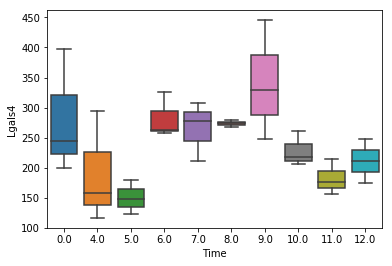

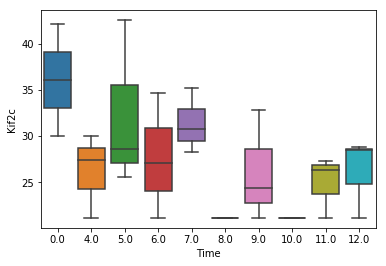

In [8]:
#Box Plot

plt.figure(2)
x = data['Time'].astype(np.float)
y = data['Lgals4'].astype(np.float)
z = data['Kif2c'].astype(np.float)

sns.boxplot(x = x, y = y, data = data)
plt.show()

sns.boxplot(x = x, y = z, data = data)
plt.show()

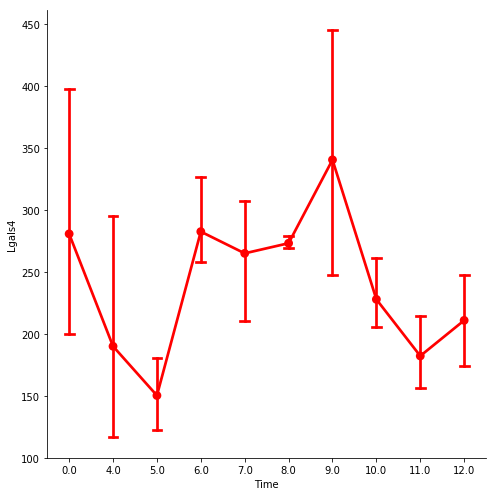

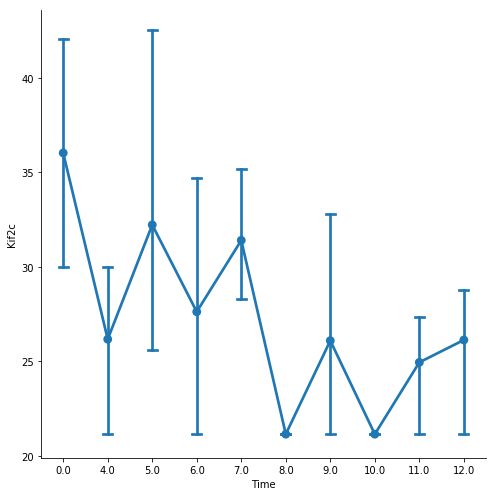

In [9]:
#Factor Plot

data = data.astype(np.float)
g = sns.factorplot(x = 'Time', y = 'Lgals4', data = data, size = 7, capsize = .2, color = 'r', markers = ["o"])
g=sns.factorplot(x = 'Time',y = 'Kif2c', data = data, size = 7, capsize = .2,  markers = ["o"])

plt.show()